# Exploratory Data Analysis on Facebook Users Data
<br><br>


## Table of Contents

1. [**Problem Statement**](#section1)<br>
2. [**Importing Packages**](#section2)<br>
3. [**Loading Data**](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br><br>
4. [**Data Preprocessing**](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br><br>
5. [**Exploratory Data Analysis**](#section5)<br>
  - 5.1 [**Analysing Facebook User data Gender-wise**](#section501)<br>
    - 5.1.1 [Gender-wise percentage distribution of Facebook Users](#section50101)<br>
    - 5.1.2 [Gender and Age-wise User distribution](#section50102)<br>
    - 5.1.3 [Gender-wise analysis of FB User 'Friend_Count'](#section50103)<br>
    - 5.1.4 [Gender-wise analysis of number of 'Friendship_Requests_Initiated' by FB Users](#section50104)<br>
    - 5.1.5 [Gender-wise analysis of number of 'Likes_Received' by FB Users](#section50105)<br>
    - 5.1.6 [Gender-wise analysis of number of 'Likes_Given' by FB Users](#section50106)<br>
    - 5.1.7 [Comparison: Friendship_Requests_Initiated to Total_Friend_Count (Gender-wise)](#section50107)<br>
    - 5.1.8 [Comparison: Total No. of Likes_Given to Total No. of Likes_Received (Gender-wise)](#section50108)<br><br>

  - 5.2 [**Analysing Facebook User data Age-wise**](#section502)<br>
      - 5.2.1 [Age-wise analysis of FB User 'Friend_count'](#section50201)<br>
      - 5.2.2 [Gender-wise analysis of number of 'Friendship_Requests_Initiated' by FB Users](#section50202)<br>
      - 5.2.3 [Gender-wise analysis of number of 'Likes_Given' by FB Users](#section50203)<br>
      - 5.2.4 [Age-wise analysis of number of 'Likes_Received' by FB Users](#section50204)<br><br>
      
  - 5.3 [**Comparison:  Users on Facebook App v/s Users on Facebook website**](#section503)<br><br>
  
6. [**Finding Facebook Users that have had no activity since registration**](#section6)<br><br>
      
7. [**Conclusion**](#section7)<br>
  - 7.1 [Actionable Insights](#section701)

<a id=section1></a>
## 1. Problem Statement

Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.



<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

C:\Users\nikit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

In [3]:
# Install chart_studio, please use this command. 

!pip install chart-studio

<a id=section3></a>
## 3. Loading Data


In [4]:
## Reading the Facebook Dataset
df_fb =pd.read_csv('https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv')

In [5]:
df_fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
df_fb.describe(include='all')

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


<a id=section301></a>
### Description of the Dataset

This dataset provides a usage analysis of various facebook users such as the tenure of their account,number of friends they have,number of friendships they have initiated , the number of likes received by them through the FB website and through the mobile app.<br><br>

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| userid                         | A numeric value uniquely identifying the user                                              |
| age	                         | Age of the user in years                                                                   |
| dob_day	                     | Day part of the user's date of birth
| dob_year	                     |Year part of the user's date of birth
| dob_month	                     |Month part of the user's date of birth
| gender	                     |Gender of the user
| tenure	                     | Number of days since the user has been on FB
|friend_count	                 | Number of friends the user has
|friendships_initiated	         |Number of friendships initiated by the user
|likes	                         |Total number of posts liked by the user
|likes_received	                 |Total Number of likes received by user's posts
|mobile_likes	                 |Number of posts liked by the user through mobile app
|mobile_likes_received	         |Number of likes received by user through mobile app
|www_likes	                     |Number of posts liked by the user through web
|www_likes_received	             |Number of likes received by user through web







In [7]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [8]:
'''
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade
'''

'\n# To install pandas profiling please run this command.\n\n!pip install pandas-profiling --upgrade\n'

In [9]:
import pandas_profiling 

In [10]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

#profile = df_fb.profile_report(title='Pandas Profiling_Facebook Data')
#profile.to_file(output_file="profiling_FacebookData.html")


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

####  Deleting columns dob_day, dob_year, dob_month since they provide no additional information

The Facebook dataset columns viz. dob_day, dob_year and dob_month, do not provide any extra information needed for EDA. Hence we delete these columns for our convience.

In [11]:
df_fb.drop(['dob_day', 'dob_year', 'dob_month'], 1, inplace=True)

In [12]:
df_fb.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,male,82.0,0,0,0,0,0,0,0,0


#### Introducing a new column 'reg_age'  (registeration age)                

90ere are 2 columns of interest here - that need to be analysed.<br>
1. Age - Users Age when data was collected
2. Tenure - No. of days since the User is registered with Facebook. 

There are some User records with age in the range 90-110years. We need to decide whether to consider such Users or delete them, because practically <br> User >95years (being optimistic with 95years) is not possible <br> 
Here we notice that some User's age when they started their account was <90 but current age (at the time of data collection) was between 90-100 years. Such Users should not be deleted.<br>

We introduce a new column 'reg_age' which indicates User's Age when they registered/started their account with Facebook. <br>

reg_age is calculated as:                    <br>
if tenure > 365:                             <br>
   reg_age = age - (int(tenure/365))         <br>
else reg_age = age <br><br>

Here we find the User's Age at the time they 1st opened the particular account with Facebook.<br>
We delete all User's having reg_age >90 years (being optimistic).<br>



In [13]:
true_val = (df_fb['age'] - (df_fb['tenure']/365))
false_val = df_fb['age']

df_fb['reg_age'] = np.where(df_fb['tenure'] >= 365, true_val, false_val)

df_fb['reg_age'] = df_fb['reg_age'].astype('int')
df_fb.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
0,2094382,14,male,266.0,0,0,0,0,0,0,0,0,14
1,1192601,14,female,6.0,0,0,0,0,0,0,0,0,14
2,2083884,14,male,13.0,0,0,0,0,0,0,0,0,14
3,1203168,14,female,93.0,0,0,0,0,0,0,0,0,14
4,1733186,14,male,82.0,0,0,0,0,0,0,0,0,14


In [14]:
print (df_fb[df_fb.reg_age >90]['userid'].count())         # 4552 users created account @90years
df_fb[df_fb.reg_age >90]

4552


,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
1690,1362614,92,male,323.0,0,0,0,0,0,0,0,0,92
1691,1234109,94,male,592.0,0,0,0,0,0,0,0,0,92
1692,2057826,95,male,364.0,0,0,0,0,0,0,0,0,95
1693,1942772,97,male,613.0,0,0,0,0,0,0,0,0,95
1694,1226208,100,female,171.0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98895,2008877,108,male,1587.0,2460,1158,2753,593,2694,327,59,266,103
98903,2085281,96,male,999.0,3738,1705,2952,3857,2223,2709,729,1148,93
98923,1761484,103,female,560.0,3018,547,5595,1926,586,810,5009,1116,101
98934,2115451,108,female,954.0,3982,1190,6016,4012,1180,2816,4836,1196,105


### Deleting Users whose age>90 at the time they created an account at Facebook i.e. reg_age>90

In [15]:
df_fb.drop(df_fb[df_fb.reg_age>90].index, inplace=True)              

In [16]:
df_fb.userid.count()

df_fb[(df_fb['age']-df_fb['reg_age']) >=5]

df_fb[df_fb.reg_age == 90]

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
1689,1669607,90,male,122.0,0,0,0,0,0,0,0,0,90
1957,1395843,90,male,0.0,0,0,95,78,95,56,0,22,90
4821,1710919,94,male,1408.0,2,2,28,2,28,1,0,1,90
8273,1006109,92,female,644.0,6,2,4,9,0,1,4,8,90
19017,2150081,92,male,475.0,23,10,3,0,0,0,3,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97460,1456216,94,male,1184.0,1464,443,201,654,7,215,194,439,90
98043,1767178,94,male,1142.0,2517,1977,1,8,1,6,0,2,90
98156,2000307,92,female,704.0,3380,131,26,47,8,23,18,24,90
98204,1963616,94,male,1210.0,2352,1329,45,188,45,163,0,25,90


<a id=section5></a>
## 5. Exploratory Data Analysis on Fabebook dataset

<a id=section501></a>
## 5.1 Analysis Based on Gender


<a id=section50101></a>
### 5.1.1  Gender-wise percentage distribution of Facebook Users   <br>

We find the percentage of Male:Female Facebook Users. 

Text(0, 0.5, '')

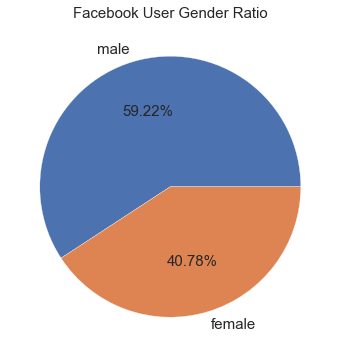

In [17]:
df_fb['gender'].value_counts().plot(figsize=(6,6), kind='pie', autopct='%3.2f%%', fontsize=15)
plt.title('Facebook User Gender Ratio',size=15)
plt.ylabel('')

<a id=section50102></a>
### 5.1.2  Gender and Age-wise User distribution <br><br>

To calculate the number of Male/Female Facebook Users across various age groups.

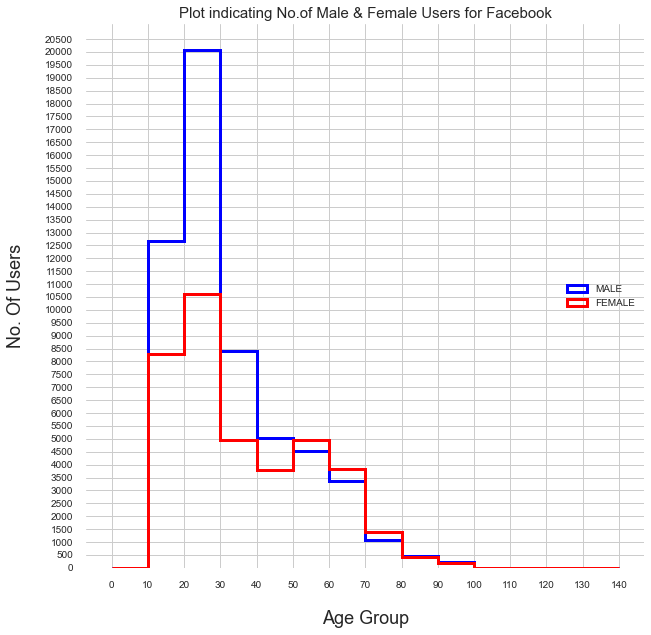

In [18]:
# Creating Age bins of 10yr each 

bins=np.arange(0,150,10)
bins

df_fb[df_fb['gender']=='male'].age.plot(kind='hist', histtype=u'step',stacked=True, bins = bins, figsize=(10, 10), 
                                        color='blue', yticks=np.arange(0,21000, 500), xticks=bins,LineWidth=3)

df_fb[df_fb['gender']=='female'].age.plot(kind='hist', histtype=u'step',stacked=True, bins = bins, figsize=(10, 10), 
                                          color='red', yticks=np.arange(0,21000, 500), xticks=bins,LineWidth=3)


plt.xlabel('Age Group',size=18, labelpad=20)
plt.ylabel('No. Of Users',size=18, labelpad=20)
plt.title('Plot indicating No.of Male & Female Users for Facebook', size=15)
plt.grid('True')

plt.legend(loc=7,labels=('MALE', 'FEMALE'))

In [19]:
df_fb.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
0,2094382,14,male,266.0,0,0,0,0,0,0,0,0,14
1,1192601,14,female,6.0,0,0,0,0,0,0,0,0,14
2,2083884,14,male,13.0,0,0,0,0,0,0,0,0,14
3,1203168,14,female,93.0,0,0,0,0,0,0,0,0,14
4,1733186,14,male,82.0,0,0,0,0,0,0,0,0,14


<a id=section50103></a>
### 5.1.3  Gender-wise analysis of 'Friend_count' i.e No. of Friends for Facebook Users across various age groups <br>

We plot 2 seperate Scatterplot-Charts to visualize the friend count for Male & Female Users seperately.

Text(0.5, 1.0, 'Scatter-Plot depicts Friend_count for Male Facebook Users')

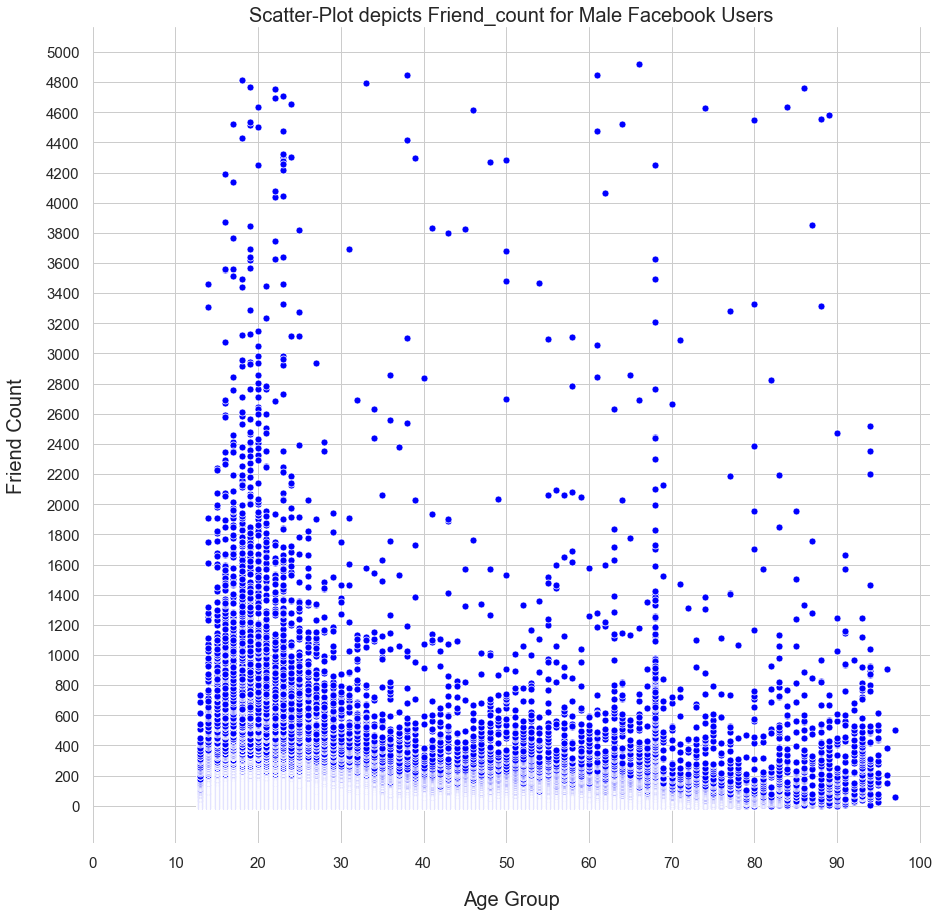

In [20]:
import seaborn as sns
plt.figure(figsize=(15,15))



df_male = df_fb[df_fb['gender']=='male']
df_female = df_fb[df_fb['gender']=='female']


#plt.subplot(1, 2, 1)    # plot-1

sns.scatterplot(x=df_male['age'], y=df_male['friend_count'],color='blue')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,5200,200), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('Friend Count', size=20, labelpad=20)
plt.title('Scatter-Plot depicts Friend_count for Male Facebook Users', size=20)


Text(0.5, 1.0, 'Scatter Plot depicts distribution of Friend_count for Female Facebook Users')

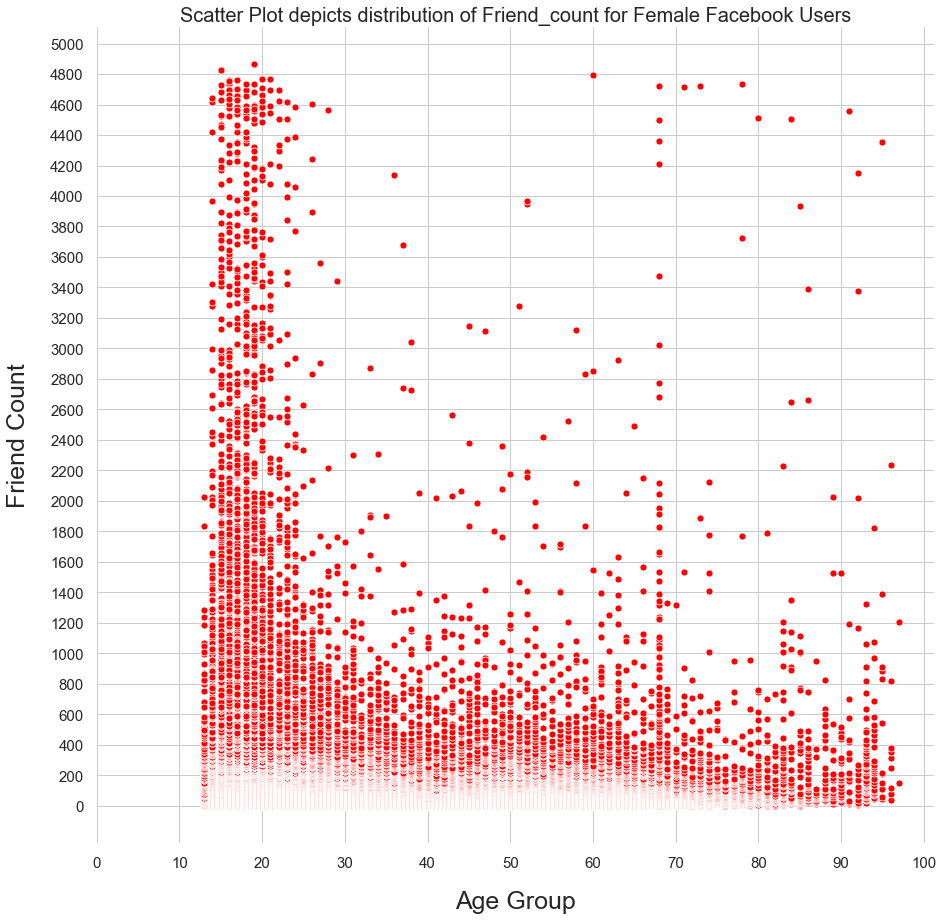

In [21]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_female['age'], y=df_female['friend_count'],color='red')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,5200,200), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=25, labelpad=20)
plt.ylabel('Friend Count', size=25, labelpad=20)
plt.title('Scatter Plot depicts distribution of Friend_count for Female Facebook Users', size=20)

<a id=section50104></a> 
### 5.1.4  Gender-wise analysis of number of 'Friendship_Requests_Initiated' by Facebook Users<br><br>

Here we analyse the Total No. of Friendship Requests Initiated by Facebook Users.<br>
We plot 2 seperate Scatter_Plots to depict the No. of Friendship Requests Initiated by Male&Female Facebook Users.

In [22]:
print(  df_fb[df_fb['gender']=='male']['friendships_initiated'].sum() )
print ( df_fb[df_fb['gender']=='female']['friendships_initiated'].sum() )


5462428
4307008


Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Friendships_Initiated by Male Facebook Users')

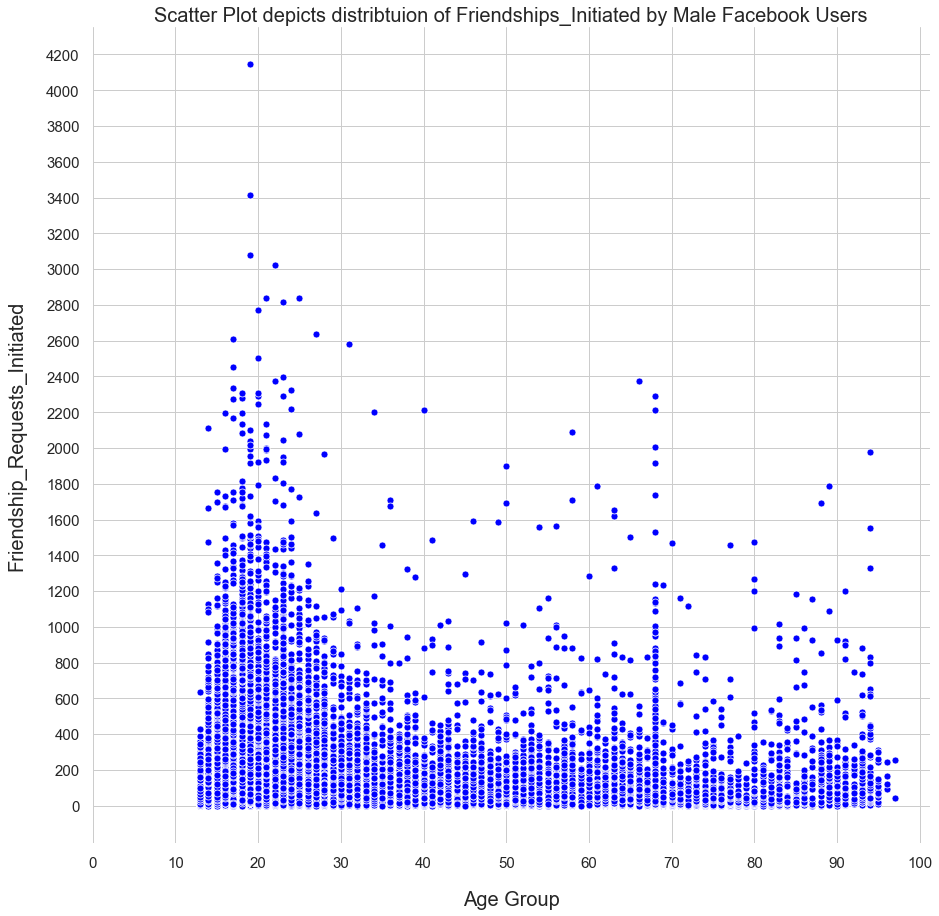

In [23]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_male['age'], y=df_male['friendships_initiated'],color='blue')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,4400,200), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('Friendship_Requests_Initiated', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Friendships_Initiated by Male Facebook Users', size=20)



In [73]:
(df_male[(df_male.friendships_initiated < 800) & (df_male.age>30)].userid.count()) / (df_male[df_male.age>30].userid.count())*100

#df_male[(df_male.friendships_initiated < 1800)&(df_male.age>30)].userid.count()  # & (df_male.age>30)

99.43145638133358

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Friendships_Initiated by Female Facebook Users')

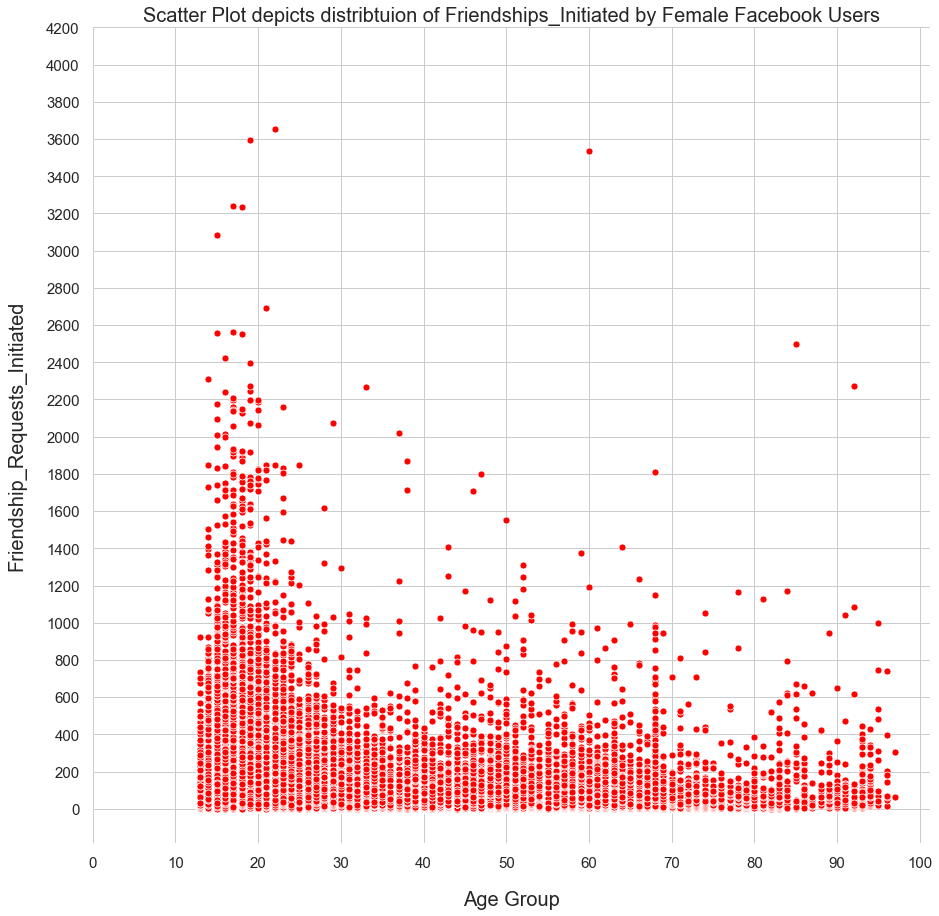

In [25]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_female['age'], y=df_female['friendships_initiated'],color='red')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,4400,200), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('Friendship_Requests_Initiated', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Friendships_Initiated by Female Facebook Users', size=20)


In [78]:
(df_female[(df_female.friendships_initiated < 800) & (df_female.age>30)].userid.count()) / (df_female[df_female.age>30].userid.count())*100

#df_male[(df_male.friendships_initiated < 1800)&(df_male.age>30)].userid.count()  # & (df_male.age>30)

99.60976638717503

<a id=section50105></a>
### 5.1.5  Gender-wise analysis of number of 'Likes_received' by FB Users

No. of Likes Received possibly depends on how actively a User posts on Facebook and/or on the quality of content posted and/or The popularity factor of the User on Facebook.

In [26]:

print(  df_fb[df_fb['gender']=='male']['likes_received'].sum() )
print(df_fb[df_fb['gender']=='female']['likes_received'].sum())


3669989
9844042


Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Likes_Received by Male Facebook Users')

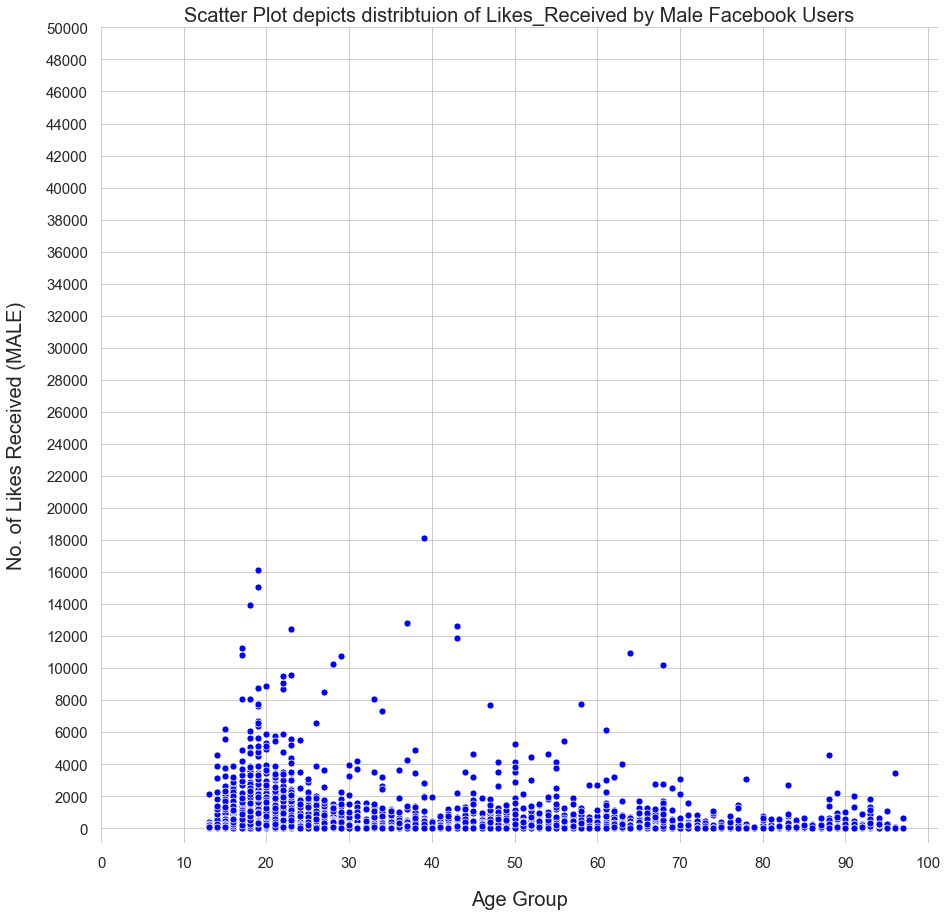

In [27]:
import seaborn as sns
plt.figure(figsize=(15,15))

df_male_reduced = df_male[df_male.likes_received < 22000]
sns.scatterplot(x=df_male_reduced['age'], y=df_male_reduced['likes_received'],color='blue' )
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,51000,2000), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('No. of Likes Received (MALE)', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Likes_Received by Male Facebook Users', size=20)



In [28]:
df_male[df_male.likes_received > 20000]

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
49230,1432020,20,male,245.0,79,50,477,53534,78,30387,399,23147,20
98686,1015907,74,male,832.0,4630,831,966,39536,941,10199,25,29337,71
98773,2042824,18,male,51.0,4817,32,1346,52964,1342,18925,4,34039,18
98878,1053087,23,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21


Outlier: <br>

We see from the above Scatter Plot that No. of Likes_Received by most Male Users are between 0-20,000 likes.<br> 
However we see 4 outliers  <br>
Finding out these extreme value records using the above code. <br>
The code above shows that there are 4 Users with extreme values for Likes_Received = 39536, 53534, 52964 and 82623.	 <br><br>

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Likes_Received by Female Facebook Users')

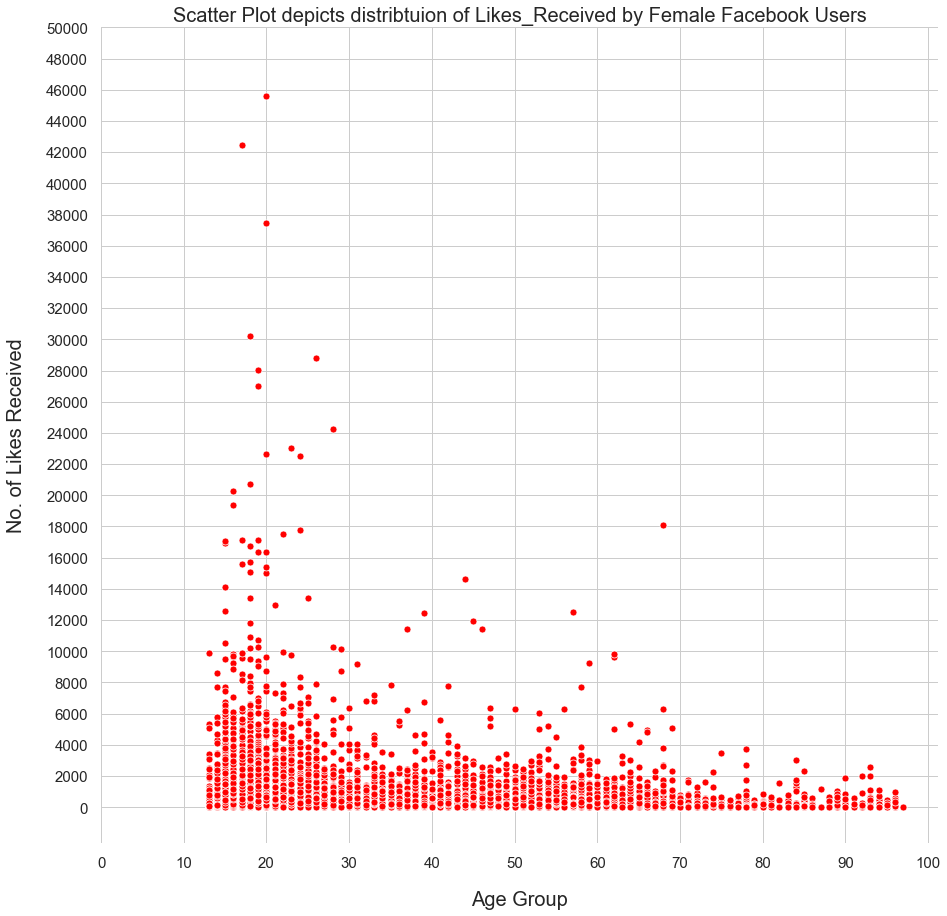

In [29]:
import seaborn as sns
plt.figure(figsize=(15,15))

# We plot Female Users upto Likes_Received < 55,000 on this graph for a closer and better view. If we include Outliers that
# ranging upto Likes_received =2,00,000, we will get a distant view of the Graph which is not as clear. 

df_female_reduce=df_female[df_female['likes_received']<55000]


sns.scatterplot(x=df_female_reduce['age'], y=df_female_reduce['likes_received'], color='red')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,51000,2000), fontsize=15)


plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('No. of Likes Received', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Likes_Received by Female Facebook Users', size=20)


In [30]:
df_female[df_female.likes_received > 46000]

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
77121,1441676,20,female,253.0,230,73,2078,178166,1982,138561,96,39605,20
94906,1674584,17,female,401.0,818,395,1016,261197,659,131244,357,129953,15
98822,1715925,23,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21
98994,2063006,20,female,402.0,1988,332,7351,106025,7248,73333,103,32692,18


#### Outliers
We can see from the above ScatterPlot and the above code, there are a few outliers. <br>
Explanation: No of Likes Received by Female Users is approximately between 0-30000 Likes. However, there are 7 Female Users who have Received > 30000 Likes. <br>
There are 4 Female Users who have received >1Lakh Likes. These Users are extremely popular (for instance they could be a  celebrity or well-known for their work and Facebook posts) or else this data is incorrectly recorded.



<a id=section50106></a>
### 5.1.6  Gender-wise analysis of number of 'Likes_Given' by FB Users

In [31]:
print(  df_fb[df_fb['gender']=='male']['likes'].sum() )
df_fb[df_fb['gender']=='female']['likes'].sum()

4604072


10145037

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Likes_Given by Male Facebook Users')

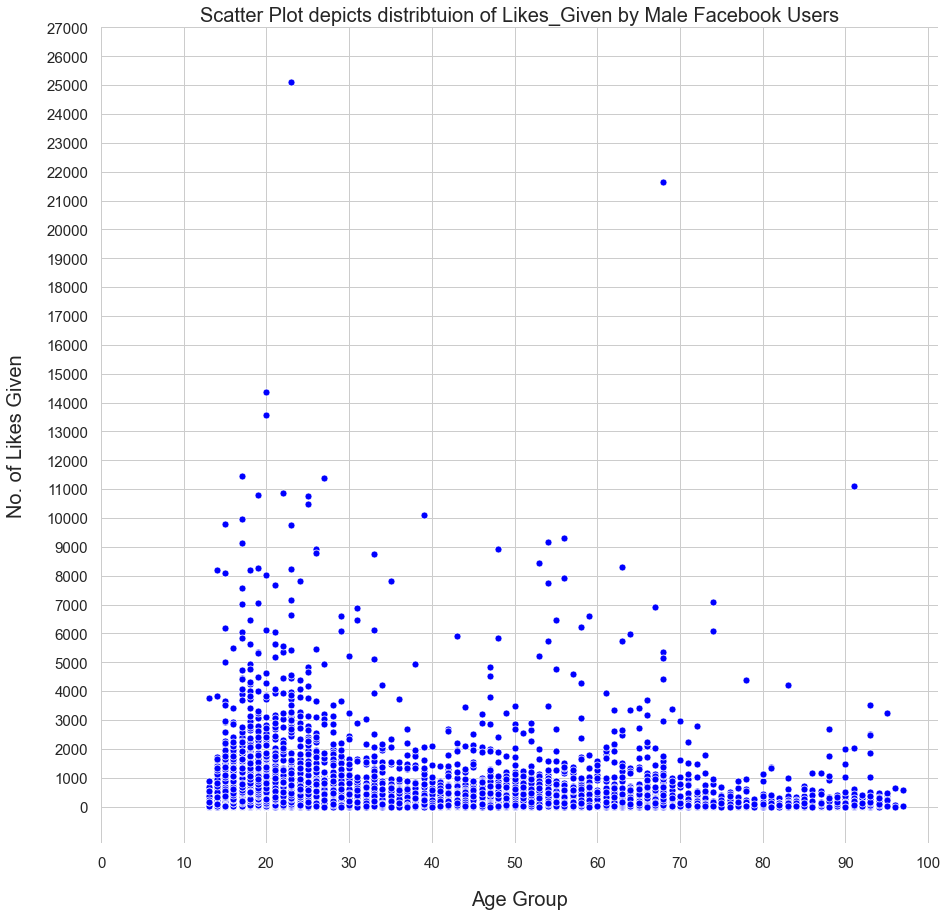

In [32]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_male['age'], y=df_male['likes'],color='blue')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,28000,1000), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('No. of Likes Given', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Likes_Given by Male Facebook Users', size=20)


In [33]:
df_male[df_male.likes > 11500]

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,reg_age
29470,1405946,20,male,307.0,37,33,13569,37,666,15,12903,22,20
93064,1656477,68,male,550.0,584,347,21652,10220,21652,8584,0,1636,66
97007,1684195,23,male,529.0,1056,665,25111,3447,25111,3111,0,336,21
98945,1783264,20,male,267.0,2536,610,14355,5151,8591,3461,5764,1690,20


Outliers<br>
We can see from the above ScatterPlot and the above code, there are a few outliers. <br>
Explanation: No of Likes Given by Male Users is approximately between 0-11500 Likes. However, there are 4 Male Users who have given >11500 Likes. The number of Likes given by them are - 13569, 14355, 21652 and 25111.


#### To find out the %age of Male Users that do not give any Likes to posts of other Facebook Users  <br>

i.e. Users having column value 'likes==0'. <br>
The code below helps us find the same.<br><br>

The below output shows that only approximately 3-4% Facebook Users do not give 'Likes' to other posts. That count is not much, so these inactive Users do not create any problem with our analysis. 


In [34]:
print('Total number of Males Users')
print (df_male.userid.count())

print()
print('age 13-20')
print(df_male[(df_male.age>=13) & (df_male.age<20)].userid.count())
print(df_male[(df_male.age>=13) & (df_male.age<20)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=13) & (df_male.age<20)].userid.count())
print(df_male[(df_male.likes == 0) & (df_male.age>=13) & (df_male.age<20)].userid.count())
print()

print()
print('age 20-30')
print(df_male[(df_male.age>=20) & (df_male.age<30)].userid.count())
print(df_male[(df_male.likes == 0) & (df_male.age>=20) & (df_male.age<30)].userid.count())
print(df_male[(df_male.age>=20) & (df_male.age<30)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=20) & (df_male.age<30)].userid.count())


print()
print('age 30-40')
print(df_male[(df_male.age>=30) & (df_male.age<40)].userid.count())
print(df_male[(df_male.likes == 0) & (df_male.age>=30) & (df_male.age<40)].userid.count())
print(df_male[(df_male.age>=30) & (df_male.age<40)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=30) & (df_male.age<40)].userid.count())


print()
print('age 40-50')
print(df_male[(df_male.age>=40) & (df_male.age<50)].userid.count())
print(df_male[(df_male.likes == 0) & (df_male.age>=40) & (df_male.age<50)].userid.count())
print(df_male[(df_male.age>=40) & (df_male.age<50)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=40) & (df_male.age<50)].userid.count())


print()
print('age 50-60')
print(df_male[(df_male.age>=50) & (df_male.age<60)].userid.count())
print(df_male[(df_male.likes == 0) & (df_male.age>=50) & (df_male.age<60)].userid.count())
print(df_male[(df_male.age>=50) & (df_male.age<60)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=50) & (df_male.age<60)].userid.count())

print()
print('age 60-70')
print(df_male[(df_male.age>=60) & (df_male.age<70)].userid.count())
print(df_male[(df_male.likes == 0) & (df_male.age>=60) & (df_male.age<70)].userid.count())
print(df_male[(df_male.age>=60) & (df_male.age<70)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=60) & (df_male.age<70)].userid.count() )


print()
print('age 70-80')
print(df_male[(df_male.age>=70) & (df_male.age<80)].userid.count())
print (df_male[(df_male.likes == 0) & (df_male.age>=70) & (df_male.age<80)].userid.count())
print(df_male[(df_male.age>=70) & (df_male.age<80)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=70) & (df_male.age<80)].userid.count() )

print()
print(df_male[(df_male.age>=80) & (df_male.age<90)].userid.count())
print (df_male[(df_male.likes == 0) & (df_male.age>=80) & (df_male.age<90)].userid.count())
print(df_male[(df_male.age>=80) & (df_male.age<90)].userid.count() / df_male[(df_male.likes == 0) & (df_male.age>=80) & (df_male.age<90)].userid.count())


Total number of Males Users
55858

age 13-20
12683
3.638267355134825
3486


age 20-30
20073
6149
3.2644332411774273

age 30-40
8403
2730
3.078021978021978

age 40-50
5038
1536
3.2799479166666665

age 50-60
4539
1190
3.8142857142857145

age 60-70
3363
860
3.91046511627907

age 70-80
1082
300
3.6066666666666665

442
97
4.556701030927835


Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Likes_Given by Female Facebook Users')

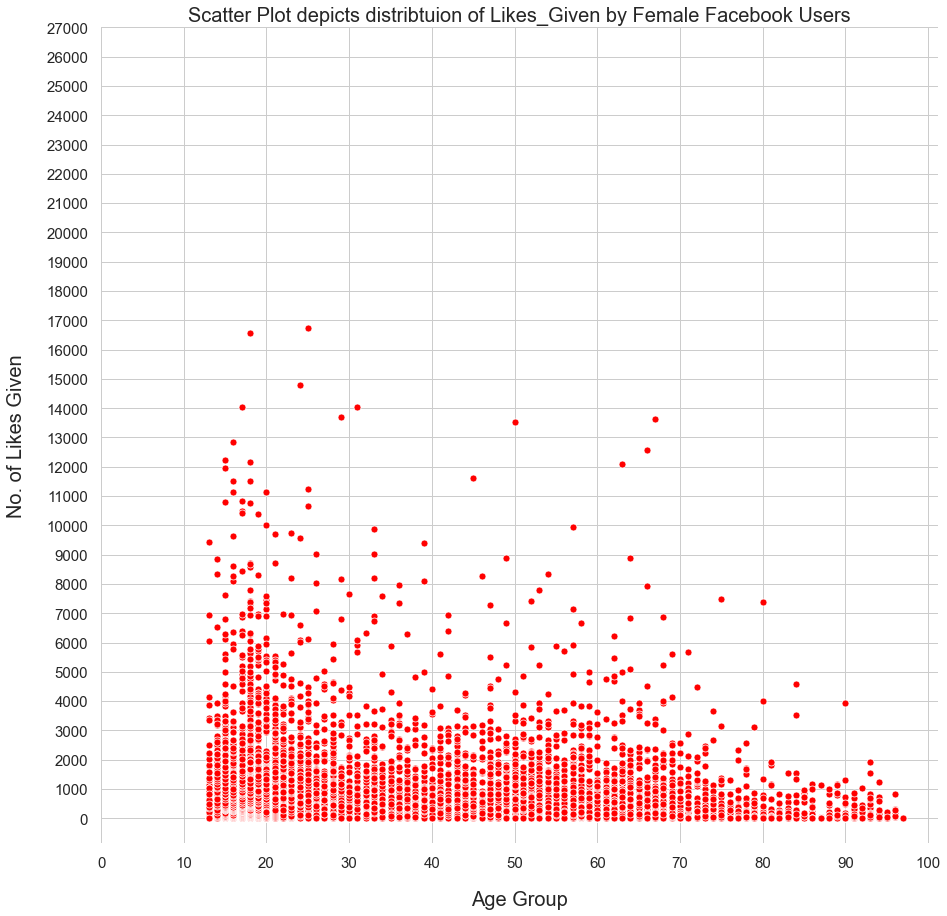

In [35]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_female['age'], y=df_female['likes'],color='red')
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,28000,1000), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('No. of Likes Given', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Likes_Given by Female Facebook Users', size=20)


<a id=section50107></a> 
### 5.1.7 Comparison: Friendship_Requests_Initiated and Total_Friend_Count  (Gender-wise)

Text(0.5, 1.0, 'Average Friend Count')

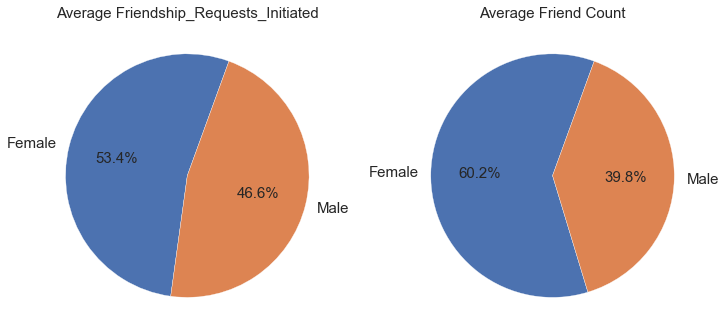

In [37]:
plt.subplot(1, 2, 1)    ######extra code for sub-plots

df_fb.groupby('gender')['friendships_initiated'].mean().plot(kind='pie',labels=labels, autopct='%3.1f%%' , 
                                                            figsize=(12,12), fontsize=15, startangle=70)

plt.ylabel('')
plt.title('Average Friendship_Requests_Initiated', fontsize=15)

plt.subplot(1, 2, 2)        #####extra code for sub-plots

df_fb.groupby('gender')['friend_count'].mean().plot(kind='pie',labels=labels, autopct='%3.1f%%' , 
                                                            figsize=(12,12), fontsize=15,startangle=70)

plt.ylabel('')
plt.title('Average Friend Count', fontsize=15)

<a id=section50108></a> 
### 5.1.8 Comparison: Total No. of Likes_Given to Total No. of Likes_Received  (Gender-wise)

Text(0.5, 1.0, 'Avg. Likes_Received')

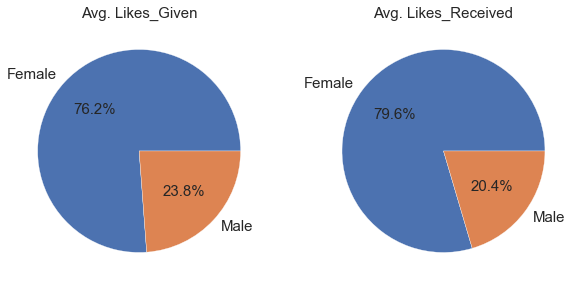

In [39]:
plt.subplot(1, 2, 1)    ######extra code for sub-plots

df_fb.groupby('gender')['likes'].mean().plot(kind='pie',labels=labels, autopct='%3.1f%%' , 
                                                            figsize=(10,10), fontsize=15)

plt.ylabel('')
plt.title('Avg. Likes_Given', fontsize=15)

plt.subplot(1, 2, 2)        #####extra code for sub-plots

df_fb.groupby('gender')['likes_received'].mean().plot(kind='pie',labels=labels, autopct='%3.1f%%' , figsize=(10,10), fontsize=15)

plt.ylabel('')
plt.title('Avg. Likes_Received', fontsize=15)

<a id=section502></a> 
### 5.2  Analysis Based on Age-group

<a id=section50201></a> 
### 5.2.1 Age-wise analysis of FB User Friend_Count

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Friend_count for Facebook Users')

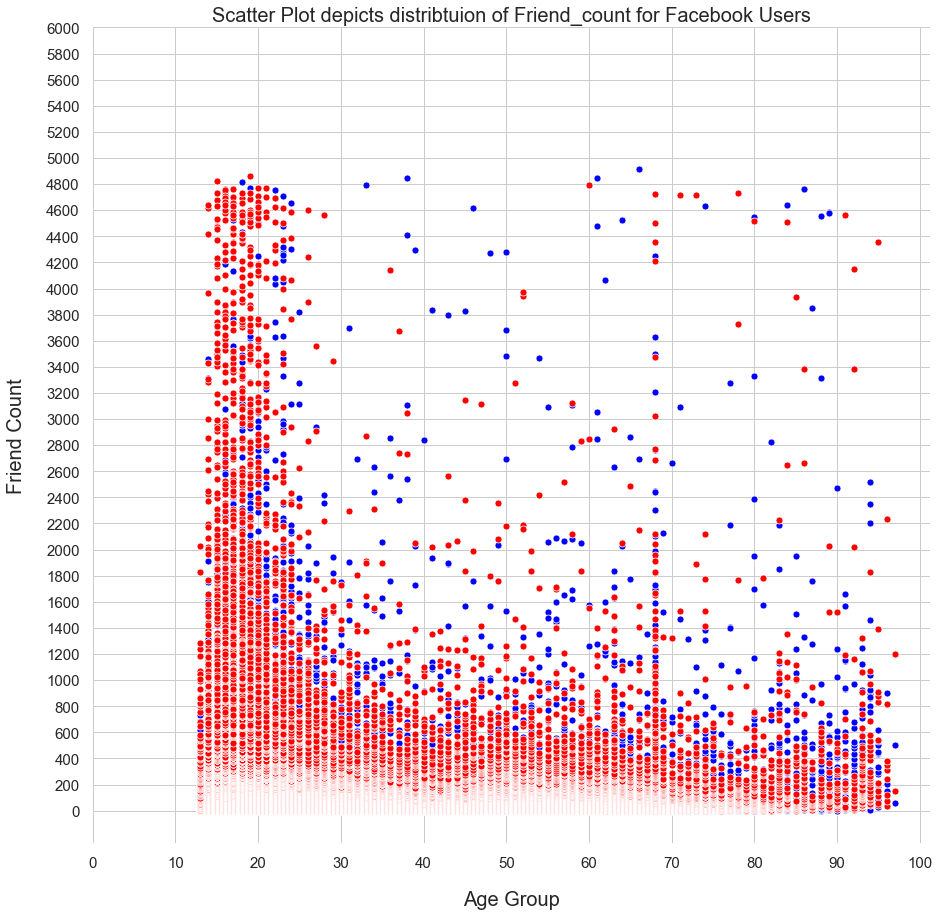

In [40]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_male['age'], y=df_male['friend_count'],color='blue')
sns.scatterplot(x=df_female['age'], y=df_female['friend_count'],color='red')

plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,6200,200), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('Friend Count', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Friend_count for Facebook Users', size=20)


<a id=section50202></a> 
### 5.2.2 Age-wise analysis of FB User Friendship_Request_Initiated

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Friendships_Initiated by Male Facebook Users')

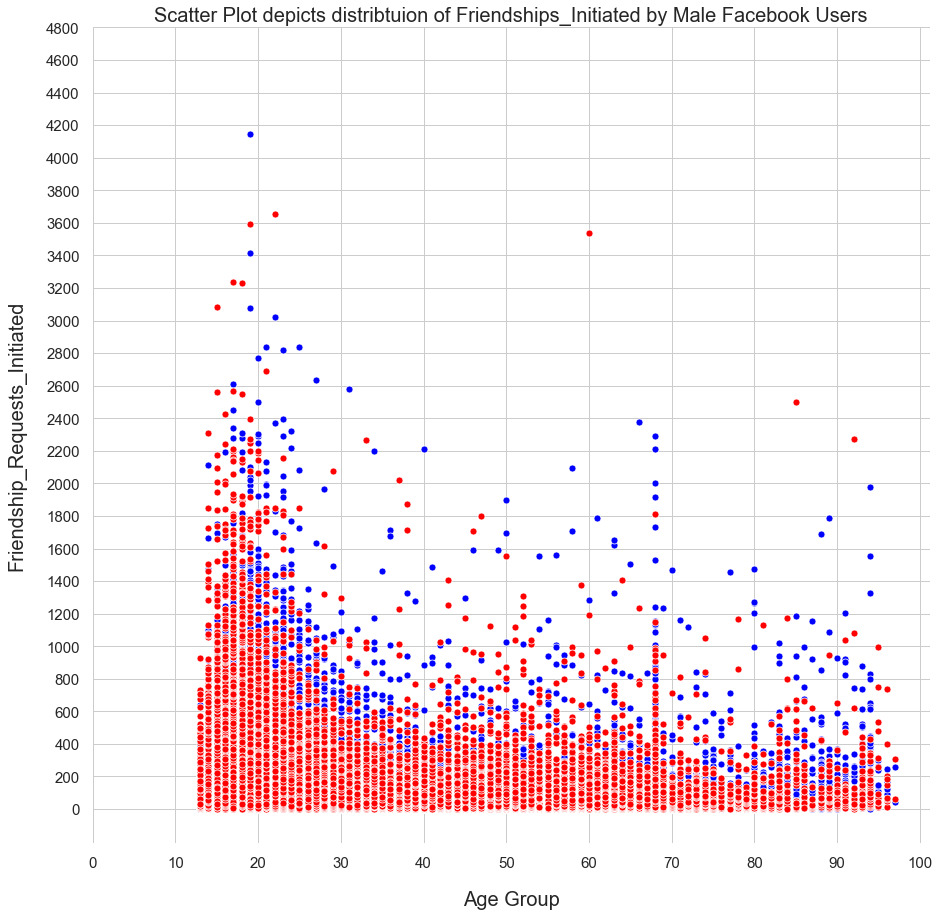

In [41]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_male['age'], y=df_male['friendships_initiated'],color='blue')
sns.scatterplot(x=df_female['age'], y=df_female['friendships_initiated'],color='red')

plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,5000,200), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('Friendship_Requests_Initiated', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Friendships_Initiated by Male Facebook Users', size=20)



<a id=section50203></a> 
### 5.2.3 Age-wise analysis of no. of Likes_Given by FB Users

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Likes_Given by Male Facebook Users')

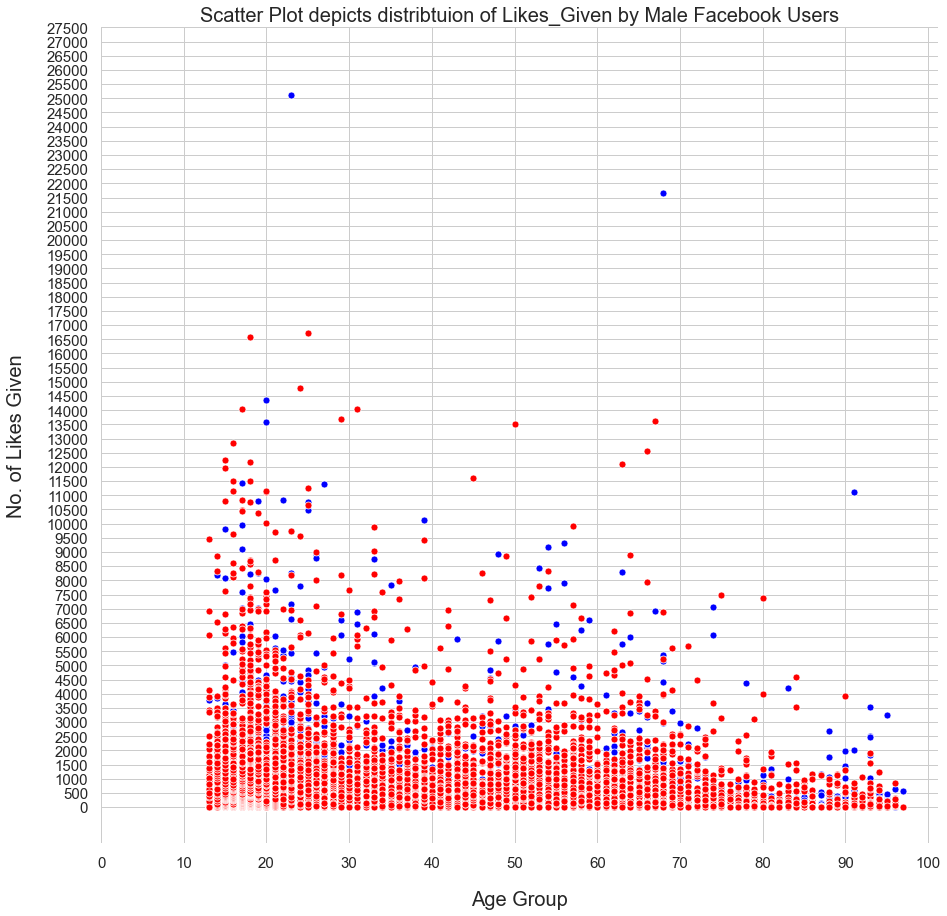

In [42]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_male['age'], y=df_male['likes'],color='blue')
sns.scatterplot(x=df_female['age'], y=df_female['likes'],color='red')

plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,28000,500), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('No. of Likes Given', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Likes_Given by Male Facebook Users', size=20)


<a id=section50204></a> 
### 5.2.3 Age-wise analysis of no. of Likes_Received by FB Users

Text(0.5, 1.0, 'Scatter Plot depicts distribtuion of Likes_Received by Male Facebook Users')

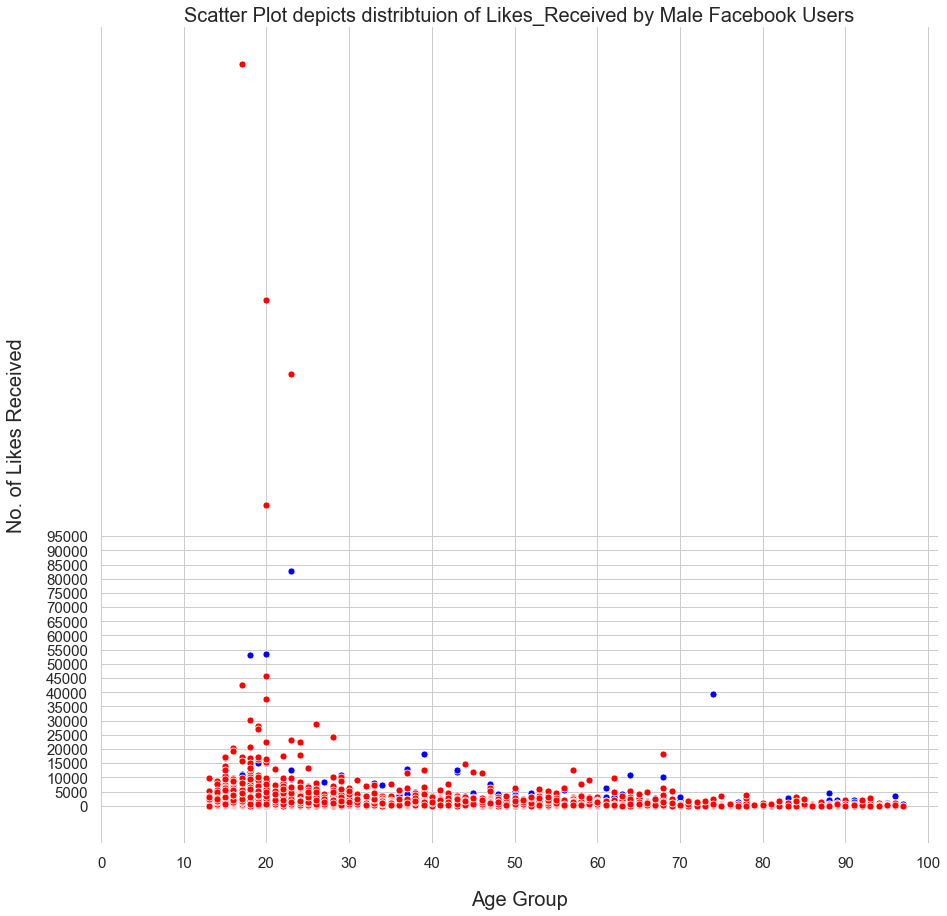

In [43]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.scatterplot(x=df_male['age'], y=df_male['likes_received'],color='blue')
sns.scatterplot(x=df_female['age'], y=df_female['likes_received'],color='red')

plt.xticks(np.arange(0,110,10),fontsize=15)
plt.yticks(np.arange(0,100000,5000), fontsize=15)

plt.grid(True)

plt.xlabel('Age Group', size=20, labelpad=20)
plt.ylabel('No. of Likes Received', size=20, labelpad=20)
plt.title('Scatter Plot depicts distribtuion of Likes_Received by Male Facebook Users', size=20)


<a id=section503></a> 
### 5.3 Comparison:  Users on Facebook App v/s Users on Facebook website

Facebook Users use either Facebook App or Facebook Website.<br>
We will analyse which mode of Facebook is more popular with the Users.

Text(0, 0.5, '')

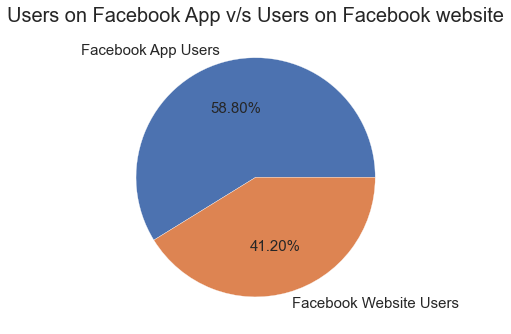

In [44]:
x= df_fb.mobile_likes_received.sum()
y=df_fb.www_likes_received.sum()

data1=[x,y]
la=['Facebook App Users','Facebook Website Users']
plt.pie(data1,labels=la, autopct='%3.2f%%', textprops={'fontsize': 15})
plt.title('Users on Facebook App v/s Users on Facebook website',size=20)
plt.ylabel('')

The above pie-chart shows that Facebook App is slightly more popular with the Users than Facebook Website.

<a id=section6></a>
### 6. Finding Facebook Users that have had no activity since registration:  

There are some Facebook Users who register no activity on facebook i.e. they satisfy the below mentioned conditions:
            friend_count=0               AND
            friendships_initiated = 0	 AND
            likes = 0                    AND
            likes_received	= 0

These Users are Inactive on Facebook i.e. they have No Friends, they have not initiated and friendship requests, they do not give Likes to other Users and they also do not receive any Likes from other Users.

In [45]:
df_fb[(df_fb['friend_count']==0) & (df_fb['friendships_initiated']==0) & (df_fb['likes']==0)&(df_fb['likes_received']==0)]['userid'].count()

1657

Hence, there are 1657 Facebook Users who have had no activity since registration.

<a id=section7></a>
### 7. Conclusion

###                      FACEBOOK – Worldwide Popular Social Networking Site for both Males & Females. <br><br>

1. Facebook seems to be a popular social networking site amongst all age groups. <br><br>

2. User Age Group: 13 – 90 years. Maximum no.of Users are youngsters belonging to age group 13-30years. <br><br>

3. Users of the Age Group 13-25 years are most active on Facebook. This Group has most number of Friends, high   
   Friendship_Request_Initiated, High Number of Likes_Given and High Number of Likes_Received. <br><br>

4. Female Users have a larger Social Network (no. of Friends) on Facebook as compared to Male Users. <br><br>

5. Female Users are more Active on Facebook – Posting articles, Receiving and Giving more Likes to other Users than Male Users.    Female Users have a higher count of 'Likes_Given' and 'Likes_Received' as compared to Male Users.  This could be either   
   because Females are more active on Facebook (posting more and/or better/meanigful content) or because Females give more Likes    hence they receive more Likes on their activity. <br><br>

6. There are atleast 4 Female Users with Likes_Received > 1lakh, <br>
   This could mean that these Users are extremely popular on Facebook (for instance they could be a celebrity or well-known for    their work and Facebook posts) or else this data is incorrectly recorded.!<br><br>
   
7. Facebook can be accessed via 2 modes: <br> 
        Facebook app (eg. using the mobile)  OR <br>
        Facebook Website  <br>
   Analysis show that Facebook Users use 'Facebook App' more than the 'Facebook Website'.<br><br>

8. There are a small number of Passive Users on Facebook: i.e. <br>
   No Friends, No Friendship_Requests Initiated and No Likes Given or Received by them. <br><br>
   
To Conclude: <br>
###  FACEBOOK helps people connect world-wide, share experiences, express themselves. It is a Window opening up to The World - to virtually travel, learn, experience places/people that we sometimes cannot physically approach.
   

<a id=section701></a>
### 7.1 Actionable Insights

1. There were data entries with Age>100years i.e. incorrect data entry <br>
   Data collection needs attention. One possiblity could be to provide drop-down choices for Users when filling in age (month, day, year of birth) to avoid incorrect entries.<br>

2. Since there are some Users with Friend Count=0, maybe Facebook can suggest social groups (randomly or based on their Facebook activity) to such Users. The Users can then consider joining these groups and eventually get into increasing their network on Facebook.